In [38]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

names = [
    "KNN",
    "SVM",
    "Decision Tree",
    "Random Forest",
    "RNA",
    "Naive Bayes",
]

classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    GaussianNB(),
]

In [39]:
benign = pd.read_csv("./dataset_benign.csv")

benign.info()

malware = pd.read_csv("./dataset_malware.csv")

malware.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4114 entries, 0 to 4113
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          4114 non-null   object 
 1   e_magic                       4114 non-null   int64  
 2   e_cblp                        4114 non-null   int64  
 3   e_cp                          4114 non-null   int64  
 4   e_crlc                        4114 non-null   int64  
 5   e_cparhdr                     4114 non-null   int64  
 6   e_minalloc                    4114 non-null   int64  
 7   e_maxalloc                    4114 non-null   int64  
 8   e_ss                          4114 non-null   int64  
 9   e_sp                          4114 non-null   int64  
 10  e_csum                        4114 non-null   int64  
 11  e_ip                          4114 non-null   int64  
 12  e_cs                          4114 non-null   int64  
 13  e_l

In [40]:
data = pd.concat([benign, malware], ignore_index=True)

data = data.sample(frac=1, ignore_index=True)

data.head()


,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_bb088d1c281333cdcaa644d7abb4ef27,23117,80,2,0,4,15,65535,0,184,...,3221225536,0,16,399,0,0,385024,434176,0,0
1,VirusShare_556a55d81fedbe2c88024fd1bfb87e5c,23117,144,3,0,4,0,65535,0,184,...,3758096544,0,11,14,0,0,178200,176128,0,0
2,VirusShare_162640d25904ece5a922514c4d435c1f,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,14,16,0,0,350488,344064,0,0
3,VirusShare_f24ddd44d8e2327a672923acfc1f2eba,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,1,132,0,0,385028,413696,0,0
4,VirusShare_3c0851e4811e7f2931cef83fa031a69a,23117,144,3,0,4,0,65535,0,184,...,3758096448,0,0,0,0,4128,131296,139264,0,0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91175 entries, 0 to 91174
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          91175 non-null  object 
 1   e_magic                       91175 non-null  int64  
 2   e_cblp                        91175 non-null  int64  
 3   e_cp                          91175 non-null  int64  
 4   e_crlc                        91175 non-null  int64  
 5   e_cparhdr                     91175 non-null  int64  
 6   e_minalloc                    91175 non-null  int64  
 7   e_maxalloc                    91175 non-null  int64  
 8   e_ss                          91175 non-null  int64  
 9   e_sp                          91175 non-null  int64  
 10  e_csum                        91175 non-null  int64  
 11  e_ip                          91175 non-null  int64  
 12  e_cs                          91175 non-null  int64  
 13  e

c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Benign'), Text(1, 0, 'Malware')]

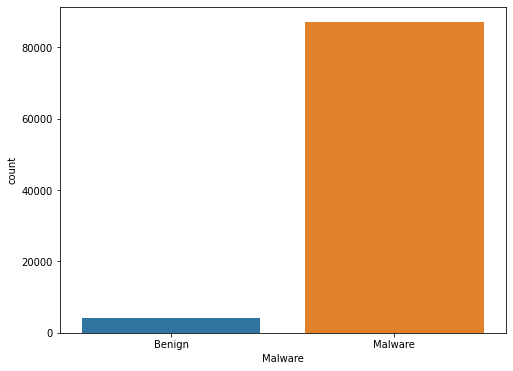

In [42]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(data['Malware'])
ax.set_xticklabels(['Benign', 'Malware'])

In [43]:
# #The target is Malware Column {0=Benign, 1=Malware}
X = data.drop(['Name', 'Malware'], axis = 1)
y = data['Malware']

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91175 entries, 0 to 91174
Data columns (total 76 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   e_magic                       91175 non-null  int64  
 1   e_cblp                        91175 non-null  int64  
 2   e_cp                          91175 non-null  int64  
 3   e_crlc                        91175 non-null  int64  
 4   e_cparhdr                     91175 non-null  int64  
 5   e_minalloc                    91175 non-null  int64  
 6   e_maxalloc                    91175 non-null  int64  
 7   e_ss                          91175 non-null  int64  
 8   e_sp                          91175 non-null  int64  
 9   e_csum                        91175 non-null  int64  
 10  e_ip                          91175 non-null  int64  
 11  e_cs                          91175 non-null  int64  
 12  e_lfarlc                      91175 non-null  int64  
 13  e

In [44]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=101)

In [45]:
# knn = neighbors.KNeighborsClassifier()

# knn.fit(X_train, y_train)

# y_pred = knn.predict(X_test)

# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))

# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)